### Importing libraries

In [1]:
%reset -f

from functions import *

import pickle

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

### Importing dataset

In [3]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [4]:
dataset_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


In [5]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00
...,...,...,...
95415,451,1,1570.00
95416,266,1,64.89
95417,572,1,89.90
95418,123,1,115.00


#### Scaling

In [6]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [7]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


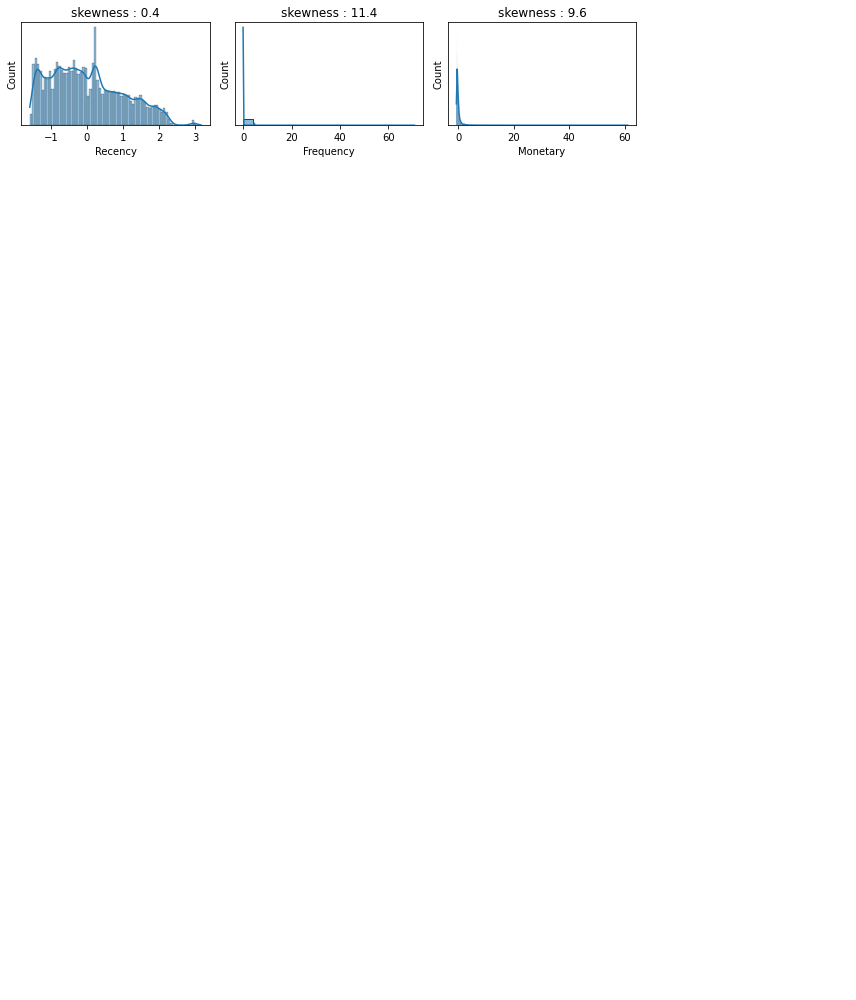

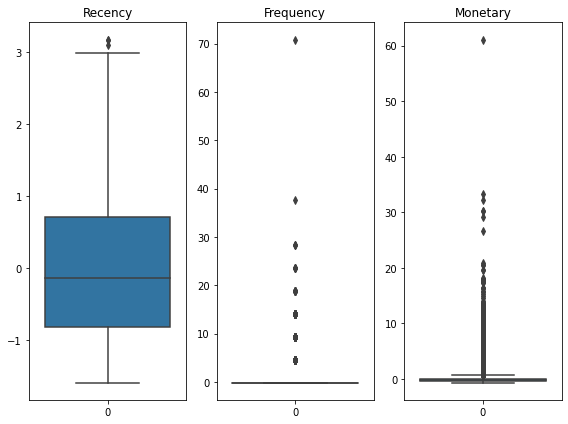

In [8]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation

In [9]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [10]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


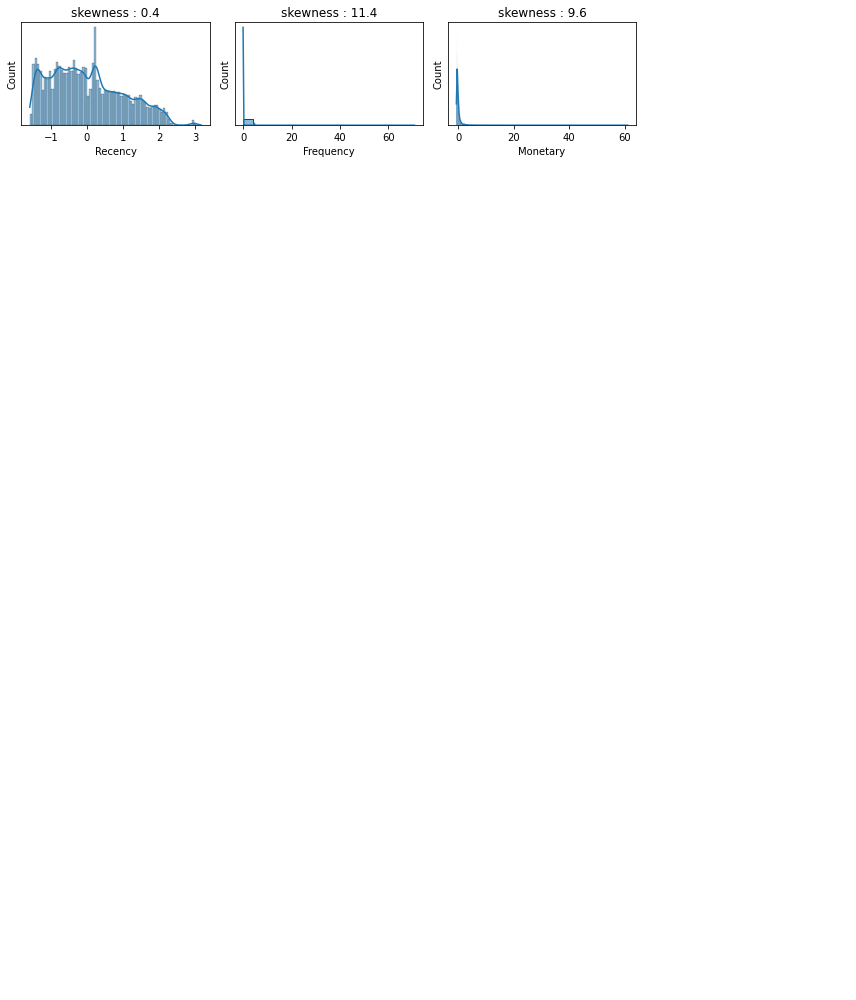

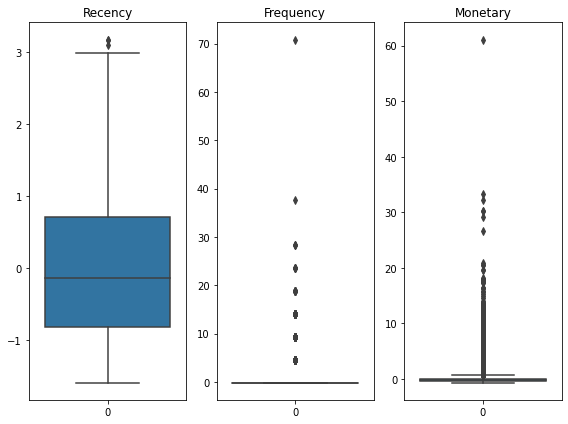

In [11]:
density_histplot(X_std)
display_boxplot(X_std)

##### Verifying that scale and std scaler are the same here

In [12]:
d = pd.concat([X_norm, X_std])
d

,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [13]:
d.drop_duplicates(keep=False)

,Recency,Frequency,Monetary


##### ATTENTION : we use only 200 clients over 95000 for these tryouts

In [14]:
X_norm_sample = X_norm.copy()
X_norm_sample = X_norm_sample.sample(n=5000, random_state=0, ignore_index=True) # we need to reset the index to get a box plot

X_norm_sample

,Recency,Frequency,Monetary
0,0.224600,4.573066,0.090923
1,0.825281,-0.161045,-0.424755
2,0.100546,-0.161045,0.030139
3,-0.689480,-0.161045,-0.493626
4,-0.297731,-0.161045,-0.227149
...,...,...,...
4995,-0.630717,-0.161045,-0.310308
4996,-0.323848,-0.161045,-0.523535
4997,1.732831,-0.161045,-0.457330
4998,2.163755,-0.161045,0.218050


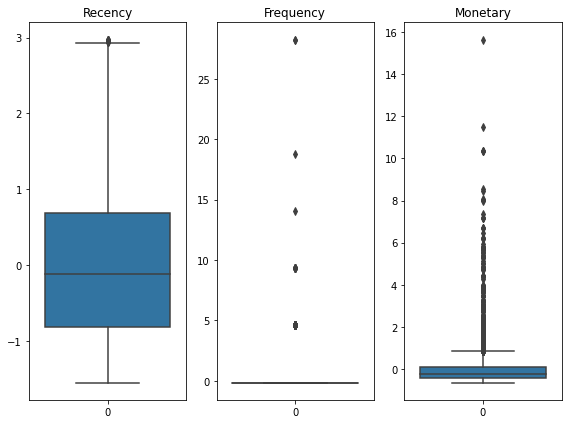

___Density distribution___


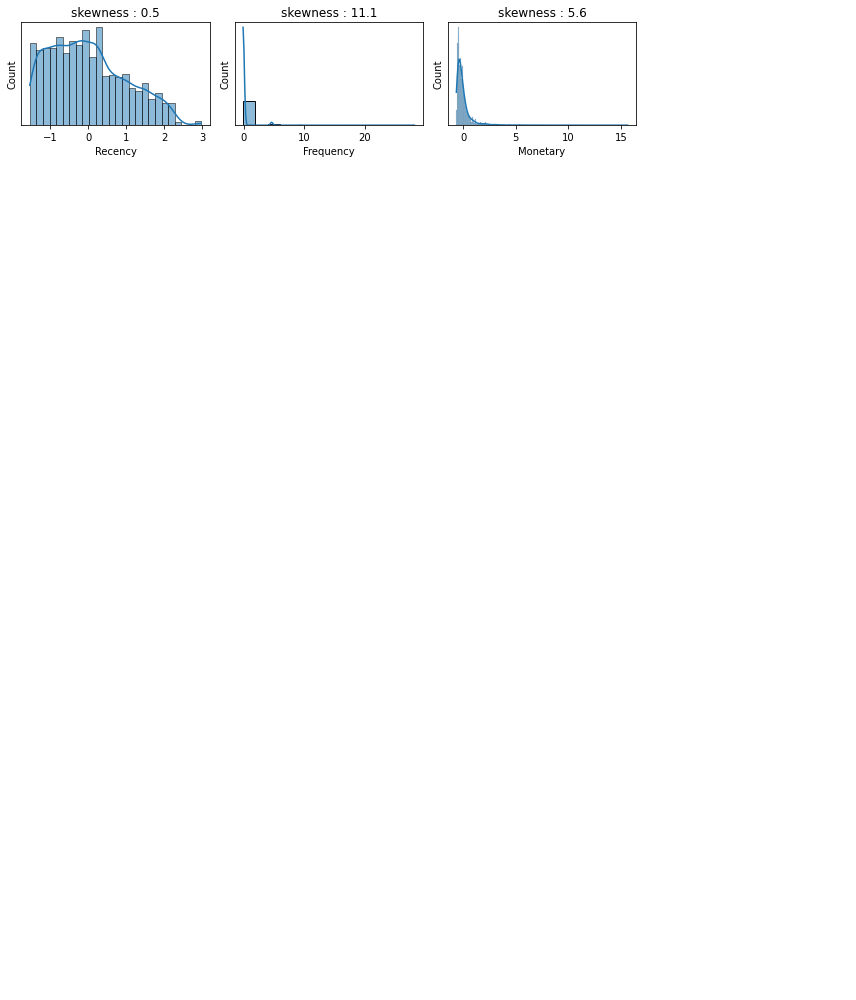

In [15]:
display_boxplot(X_norm_sample)
density_histplot(X_norm_sample)

### PCA : Principal Component Analysis

In [16]:
pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

[0.36938074 0.70282884]


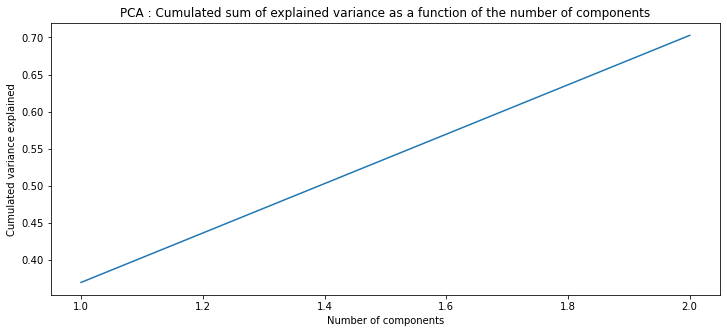

In [17]:
plt.figure(figsize=(12,5))
plt.title('PCA : Cumulated sum of explained variance as a function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulated variance explained')

plt.plot(np.arange(start=1, stop=pca.n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

In [18]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

List of variance explained per component : [0.36938074 0.3334481 ]
Sum of the variance explained per component : 0.7028288419547457


In [19]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", pca.explained_variance_ratio_.cumsum()[1], "% of the variance.")

The PCA with 2 components explains 0.7028288419547457 % of the variance.


In [20]:
X_pca

array([[-0.03654755, -0.82589883],
       [-0.39241169, -0.91196277],
       [-0.62191752,  1.83785248],
       ...,
       [-0.5839313 ,  2.05570828],
       [-0.0913012 , -0.7889165 ],
       [-0.61139795,  1.48787831]])

##### projection

(-0.7, 0.7)

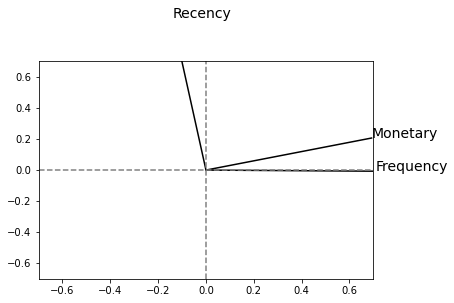

In [22]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_norm.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [21]:
# sample :
pca_sample = PCA(n_components=2)
pca_sample.fit(X_norm_sample)
print(pca_sample.explained_variance_ratio_.cumsum())
X_pca_sample = pca_sample.transform(X_norm_sample)

[0.41106477 0.73319995]


### t-SNE

In [23]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_norm_sample)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### K-Means Clustering

#### First tryout

In [24]:
kmeans_cluster = KMeans(n_clusters=3, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm_sample)

# kmeans_cluster.labels_

KMeans(n_clusters=3, random_state=0)

In [25]:
kmeans_cluster.inertia_

7400.869654525691

In [26]:
silh = silhouette_score(X_norm_sample, kmeans_cluster.labels_)
silh

0.4534586905355201

##### Visualizing

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

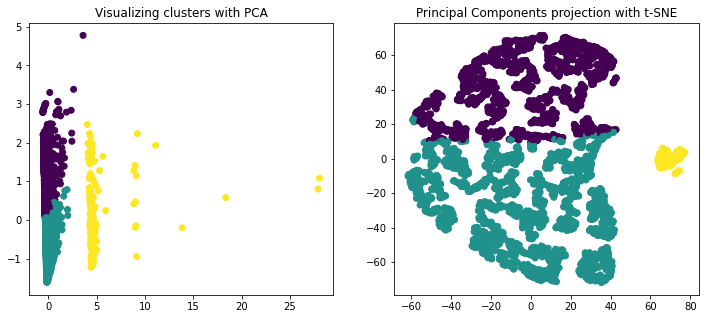

In [27]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=kmeans_cluster.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=kmeans_cluster.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


<AxesSubplot:>

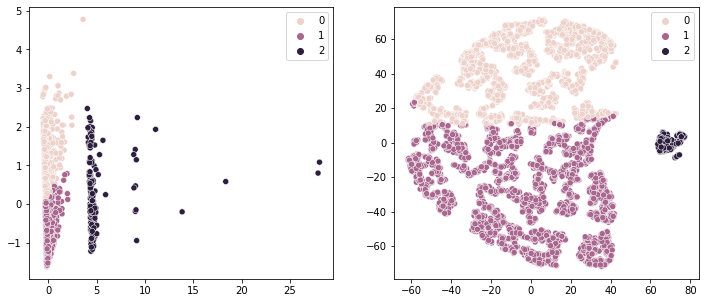

In [28]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_pca_sample[:, 0], y=X_pca_sample[:, 1],
    hue=kmeans_cluster.labels_,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=kmeans_cluster.labels_,
    ax=ax2
)

#### Searching the best number of clusters K

In [29]:
inertia = {}
dict_kmeans = {}

for num_clusters in range(1, 25):
    print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    verbose=1,
                    random_state=0).fit(X_norm_sample)
    inertia[num_clusters] = kmeans_cluster.inertia_
    dict_kmeans[num_clusters] = kmeans_cluster



Trying K = 1
Initialization complete
Iteration 0, inertia 41731.49539354346.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 19300.063204958216.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 26107.779528522842.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 17975.491952934994.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16169.938324603208.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16869.435789765837.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16012.561188368047.
Iteration

In [30]:
inertia

{1: 15446.581972263813,
 2: 10768.363900110378,
 3: 7400.869654525691,
 4: 5095.659940329821,
 5: 3890.042908611846,
 6: 3072.937906034521,
 7: 2453.4349271199762,
 8: 2174.780157184291,
 9: 1962.8057629320558,
 10: 1721.0489296124993,
 11: 1581.9656164721564,
 12: 1453.9275696117272,
 13: 1334.2568713465514,
 14: 1232.5772328585913,
 15: 1164.5247191507667,
 16: 1071.4476434540952,
 17: 1010.2822776327938,
 18: 942.9665532174686,
 19: 869.2419513424711,
 20: 819.0724833456989,
 21: 765.3433375415233,
 22: 733.8438305737003,
 23: 707.2020725328817,
 24: 655.9342444022533}

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

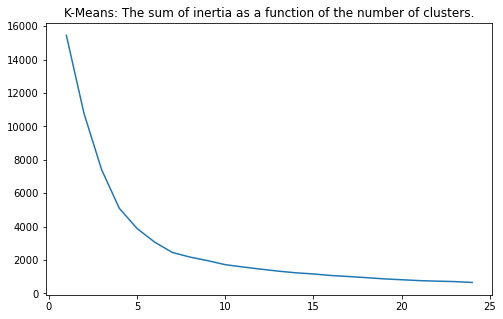

In [31]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

We want the silhouette score to be close to 1.


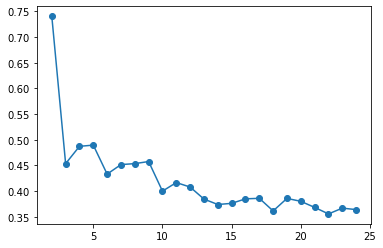

In [32]:
silhouettes = []
for num_clusters in range(2, 25):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)
    silh = silhouette_score(X_norm_sample, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, 25), silhouettes, marker='o')

### Hierarchical clustering

In [33]:
hierarchical_cls = AgglomerativeClustering().fit(X_norm_sample) # n_clusters=5

In [34]:
hierarchical_cls

AgglomerativeClustering()

In [35]:
hierarchical_cls.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
hierarchical_cls.n_clusters

2

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

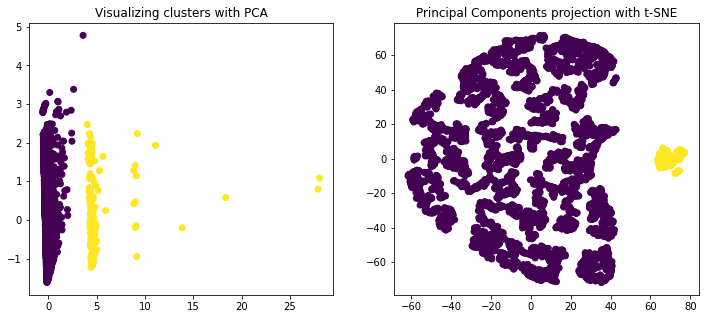

In [37]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=hierarchical_cls.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=hierarchical_cls.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


In [38]:
silhouette_score(X_norm_sample, hierarchical_cls.labels_)

0.7404840374356035

#### Giving a rank to each customer based on RFM using K-Means

##### Clustering RFM variables using K-Means

In [39]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)

In [40]:
rfm_columns = ['Recency','Frequency','Monetary']

In [41]:
rfm_clustering = apply_kmeans_per_column(dataset_rfm, rfm_columns, kmeans_cluster, n_clusters=4)

Before


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
1                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
2                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                254.0  
1                728.0  
2                405.0  
3                127.0

After


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Before


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

After


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Before


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
1                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
2                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  329.0    550.90  
1                  960.0   1520.88  
2                  109.0    175.66  
3                 2300.0  13440.00

After


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [42]:
display(rfm_clustering)

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1
...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,0,0


##### Segmentation as a function of RFM criteria : getting ideas

In [43]:
all_possibilities = rfm_clustering.copy()

all_possibilities = all_possibilities[["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]]
all_possibilities["Combinaison"] = all_possibilities["Recency_cluster"] * 100 + all_possibilities["Frequency_cluster"] * 10 + all_possibilities["Monetary_cluster"]

display(all_possibilities)
all_possibilities.value_counts()

,Recency_cluster,Frequency_cluster,Monetary_cluster,Combinaison
0,3,0,0,300
1,3,0,0,300
2,0,0,0,0
3,1,0,0,100
4,1,0,1,101
...,...,...,...,...
95415,0,0,3,3
95416,1,0,0,100
95417,0,0,0,0
95418,3,0,0,300


Recency_cluster  Frequency_cluster  Monetary_cluster  Combinaison
2                0                  0                 200            21546
3                0                  0                 300            20055
1                0                  0                 100            19302
0                0                  0                 0              12962
2                0                  1                 201             4516
3                0                  1                 301             4194
1                0                  1                 101             4100
0                0                  1                 1               2805
1                0                  2                 102              779
2                0                  2                 202              706
3                0                  2                 302              689
0                0                  2                 2                486
2                1                

In [44]:
print("We have {} combinaisons possible here.".format(all_possibilities["Combinaison"].nunique()))

n_clusters = 4
rfm_variables = 3
print("In theory, we would have {} combinaisons.".format(n_clusters ** rfm_variables))

We have 53 combinaisons possible here.
In theory, we would have 64 combinaisons.


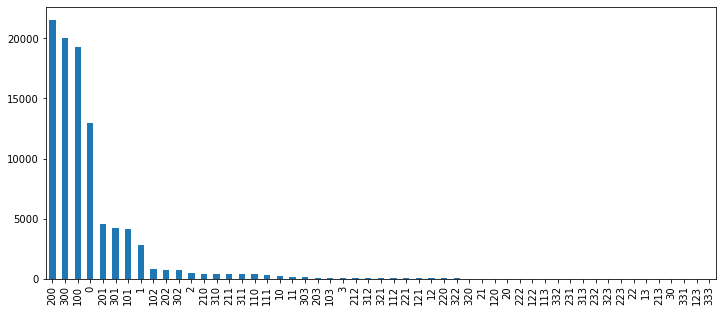

In [45]:
data = all_possibilities['Combinaison']

fig = plt.figure(figsize=(12, 5))
data.value_counts().plot(kind='bar');

##### Specifying each cluster with describe

In [46]:
description_clustering = rfm_clustering.copy()

for i, rfm_variable in enumerate(["Recency", "Frequency", "Monetary"]):
    for j, rfm_cluster in enumerate(["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]):
        if i == j:
            display(description_clustering[[rfm_cluster, rfm_variable]].groupby(rfm_cluster).describe())

Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [54]:
recency_dict = {
    0: "two_years_ago_",
    1: "last_year_",
    2: "4-6_months_ago_",
    3: "0_4_months_ago_"
}

frequency_dict = {
    0: "1_order_",
    1: "2_orders_",
    2: "3_to_4_orders_",
    3: "more_than_5_orders_"
}

# 1 euro = 0.2 BRL
monetary_dict = {
    0: "up_to_176_BRL",
    1: "up_to_551_BRL",
    2: "up_to_1521_BRL",
    3: "up_to_13440_BRL"
}

##### Segmentation

In [87]:
rfm_clustering['Classification'] = 'none'

#filter_ = (rfm_clustering['Classification'] == 'none')

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 2) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0) # bought once
                   & (rfm_clustering['Classification'] == 'none'), # so that we won't over write classification
                   'Classification'] = recency_dict[2]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)
                    & (rfm_clustering['Classification'] == 'none'), # bought once
                   'Classification'] = recency_dict[3]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 1) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none') ,
                   'Classification'] = recency_dict[0]  + frequency_dict[0] + monetary_dict[0]


#Lowest-spending only_bought_once customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) & # bought recently or not sooo long ago
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought once
                   (rfm_clustering['Monetary_cluster'] <= 1)  # bought cheap stuff
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[1]


In [88]:
data = rfm_clustering['Classification']

data.value_counts()

4-6_months_ago_1_order_up_to_176_BRL    21546
0_4_months_ago_1_order_up_to_176_BRL    20055
last_year_1_order_up_to_176_BRL         19302
none                                    14650
two_years_ago_1_order_up_to_176_BRL     12962
last_year_1_order_up_to_551_BRL          6905
Name: Classification, dtype: int64

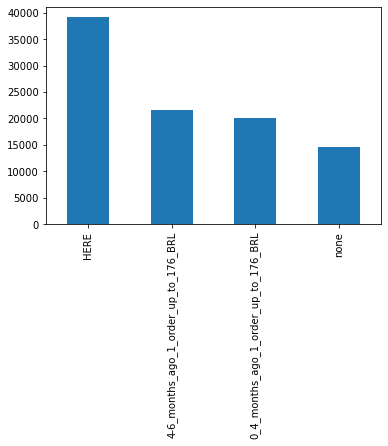

In [73]:
data.value_counts().plot(kind='bar');

In [52]:
print("To get a segmentation idea")
rfm_clustering[rfm_clustering['Classification'] == 'none']

To get a segmentation idea


,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Classification
7,00053a61a98854899e70ed204dd4bafe,186,1,382.0,2,0,1,none
22,000fbf0473c10fc1ab6f8d2d286ce20c,38,1,285.8,3,0,1,none
53,0025795df7a7d077c4c90162fa820085,40,1,177.9,3,0,1,none
59,002aba8c1af80acacef6e011f9f23262,187,1,199.9,2,0,1,none
72,003162bf0351f47a1a247992b8b9b42d,50,1,514.9,3,0,1,none
...,...,...,...,...,...,...,...,...
95390,ffe9e41fbd14db4a7361347c56af5447,203,1,199.0,2,0,1,none
95392,ffebb6424578e7bb153322da9d65634f,594,1,629.0,0,0,2,none
95409,fff7219c86179ca6441b8f37823ba3d3,249,1,245.8,2,0,1,none
95414,fffcc512b7dfecaffd80f13614af1d16,145,1,688.0,2,0,2,none


In [53]:
# End of simulation time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 131.718771 sec
computing time : 00:02:11
